# Ejercicio Final Módulo 3

##### === Brigitte J. Manrique Báez ===

Importar librerías

In [310]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [311]:
# Carga y Lectura de archivos
# 1. Archivo Customer Flight Activity
df_vuelos = pd.read_csv('Customer Flight Activity.csv')
df_vuelos.head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


In [312]:
# Carga y Lectura de archivos
# 2. bda-modulo-3-evaluacion-final-BrigitteManriqueB/Customer Loyalty History.csv
df_fidelidad_marca = pd.read_csv('Customer Loyalty History.csv')
df_fidelidad_marca.head(3)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


### **Fase 1: Exploración y Limpieza**

### Exploración Inicial


- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
- Une los dos conjuntos de datos de la forma más eficiente

**Exploración inicial de los datos usando una función**

In [313]:
def explorar_varios_dataset(df1, df2): 
    print('*****************************')
    print("Tamaño del dataset:") # Tamaño de los dataset (filas y columnas)
    print(f"El Dataframe vuelos tiene un total de {df_vuelos.shape[0]} Filas, y {df_vuelos.shape[1]} Columnas")
    print(f"El Dataframe didelidad de marca tiene un total de {df_fidelidad_marca.shape[0]} Filas, y {df_fidelidad_marca.shape[1]} Columnas\n") # Tamaño del dataset (filas y columnas)
    print('*****************************')

    # Visualización primeras 5 filas
    print("\nPrimeras 5 filas df_vuelos:") 
    display(df_vuelos.head()) 
    print("\nPrimeras 5 filas df_fidelidad_marca:") 
    display(df_fidelidad_marca.head())

    # Información resumida de los datos del dataframe
    print("\nInformación resumida df_vuelos:\n") 
    display(df_vuelos.info())
    print("\nInformación resumida df_fidelidad_marca:\n") 
    display(df_fidelidad_marca.info())    
    print('*****************************')

# Llamamos a la función para ver los datos
explorar_varios_dataset(df_vuelos, df_fidelidad_marca)

*****************************
Tamaño del dataset:
El Dataframe vuelos tiene un total de 405624 Filas, y 10 Columnas
El Dataframe didelidad de marca tiene un total de 16737 Filas, y 16 Columnas

*****************************

Primeras 5 filas df_vuelos:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0



Primeras 5 filas df_fidelidad_marca:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN



Información resumida df_vuelos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


None


Información resumida df_fidelidad_marca:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellati

None

*****************************


#### Tipos de datos

In [314]:
# Tipos de datos por columna
print('*****************************')
print("\nTipos de datos df_vuelos:") 
display(df_vuelos.dtypes)
print("\nTipos de datos df_fidelidad_marca:") 
display(df_fidelidad_marca.dtypes)
print('*****************************')

*****************************

Tipos de datos df_vuelos:


Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object


Tipos de datos df_fidelidad_marca:


Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

*****************************


#### Identificación de valores nulos

In [315]:
# Identifico si hay valores nulos o faltantes en los registros

nulos_vuelos = df_vuelos.isnull().sum()
print("\nValores nulos en df_vuelos:") 
display(df_vuelos.isnull().sum())
# % nulos ordenados de mayor a menor
nulos_vuelos.sort_values(ascending=False)


print("\nValores nulos en df_fidelidad_marca:") 
nulos_fidelidad_marca = df_fidelidad_marca.isnull().sum()
display(df_fidelidad_marca.isnull().sum())



Valores nulos en df_vuelos:


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64


Valores nulos en df_fidelidad_marca:


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

#### Identificación de valores duplicados

In [316]:
# Identifico si hay registros exactamente iguales o muy similares. Si los hay calculo su cantidad.

print('*****************************')
print(f"\nLas filas duplicadas en datos df_vuelos: {df_vuelos.duplicated().sum()}" ) # Tipos de datos por columna
print(f"\nLas filas duplicadas en datos df_fidelidad_marca: {df_fidelidad_marca.duplicated().sum()}\n") # Tipos de datos por columna
print('*****************************')

*****************************

Las filas duplicadas en datos df_vuelos: 1864

Las filas duplicadas en datos df_fidelidad_marca: 0

*****************************


#### Principales estadísticas de todas las columnas de los dos dataframes

In [317]:
print('*****************************')
print(f'\nPrincipales estadísticas de df_vuelos') # Variables numéricas
print(f'\nNuméricas:')
display(df_vuelos.describe().T)


*****************************

Principales estadísticas de df_vuelos

Numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [292]:
print('*****************************')
print(f'\nPrincipales estadísticas de df_fidelidad_marca')
print(f'\nNuméricas:')
display(df_fidelidad_marca.describe().T) # Variables numéricas
print('*****************************')
print(f'\nCategóricas:')
display(df_fidelidad_marca.describe(include = "O").T) # Variables categóricas

*****************************

Principales estadísticas de df_fidelidad_marca

Numéricas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


*****************************

Categóricas:


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


#### Identifico valores únicos y de frecuencia de cada dataframe

In [318]:
# Identifico valores únicos y de frecuencia en df_vuelos
# No analizo tipo de dato categórico porque no los tiene. Solo tiene datos de tipo numérico.

def mostrar_valores_frecuencias(df, select_dtypes=None, index_column=None):# select_types nos permite elegir el tipo de datos que queremos obtener de las columnas
    columnas = df_vuelos.select_dtypes(include=select_dtypes).columns # Creamos variable donde asignamos la posibilidad de elegir el tipo de dato.
    for columna in columnas: # itera por cada columna del dataframe
        print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{columna}' -----------\n") # Homogeniza los nombres de las columnas.
        print(f'Sus valores únicos son:\n {df_vuelos[columna].unique()}') # Devuelve los valores únicos
        print(f'Las frecuencias de los valores únicos de las columnas son:\n {df_vuelos[columna].value_counts().reset_index()}') # Cuenta la frecuencia de valores únicos de una columna

mostrar_valores_frecuencias(df_vuelos, select_dtypes=['int64','float']) # Elegimos object si queremos columnas con variables numéricas.

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'Loyalty Number' -----------

Sus valores únicos son:
 [100018 100102 100140 ... 999731 999788 999891]
Las frecuencias de los valores únicos de las columnas son:
        Loyalty Number  count
0              678205     72
1              989528     48
2              373638     48
3              684889     48
4              684881     48
...               ...    ...
16732          428526     24
16733          428536     24
16734          428565     24
16735          428590     24
16736          999891     24

[16737 rows x 2 columns]
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'Year' -----------

Sus valores únicos son:
 [2017 2018]
Las frecuencias de los valores únicos de las columnas son:
    Year   count
0  2017  202812
1  2018  202812
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'Month' -----------

Sus valores únicos son:
 [ 1  9  2  3 11  4  5  7  6  8 10 12]
Las frecuencias de los valores únicos de las columnas son:
     Month  count
0 

-------------------
- Algunos comentarios llamativos en este análisis de valores únicos y frecuencias:s:
    - El registro de años son dos: 2017 y 2018
    - Hay clientes inscritos en el programa de lealtad pero no han hecho ninguna reserva de vuelo porque tanto en distancia como total
    de vuelos aparece en cero.  

-------------------
    

In [319]:
# Identifico valores únicos y de frecuencia en df_fidelidad_marca
# Analizo tanto variables categóricas como numéricas.

def mostrar_valores_frecuencias(df, select_dtypes=None, index_column=None):# select_types nos permite elegir el tipo de datos que queremos obtener de las columnas
    columnas = df_fidelidad_marca.select_dtypes(include=select_dtypes).columns # Creamos variable donde asignamos la posibilidad de elegir el tipo de dato.
    for columna in columnas: # itera por cada columna del dataframe
        print(f" \n----------- ESTAMOS ANALIZANDO LA COLUMNA: '{columna}' -----------\n") 
        print(f'Sus valores únicos son:\n {df_fidelidad_marca[columna].unique()}') # Devuelve los valores únicos
        print(f'Las frecuencias de los valores únicos de las columnas son:\n {df_fidelidad_marca[columna].value_counts().reset_index()}') # Cuenta la frecuencia de valores únicos de una columna

mostrar_valores_frecuencias(df_fidelidad_marca, select_dtypes=['int64','float'])
mostrar_valores_frecuencias(df_fidelidad_marca, select_dtypes= object) # Elegimos object si queremos columnas con variables numéricas.

 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'Loyalty Number' -----------

Sus valores únicos son:
 [480934 549612 429460 ... 776187 906428 652627]
Las frecuencias de los valores únicos de las columnas son:
        Loyalty Number  count
0              480934      1
1              208485      1
2              455896      1
3              469781      1
4              533488      1
...               ...    ...
16732          922188      1
16733          780529      1
16734          721438      1
16735          761015      1
16736          652627      1

[16737 rows x 2 columns]
 
----------- ESTAMOS ANALIZANDO LA COLUMNA: 'Salary' -----------

Sus valores únicos son:
 [ 83236.     nan 103495. ...  76178.  91970. -57297.]
Las frecuencias de los valores únicos de las columnas son:
         Salary  count
0     101933.0     23
1      62283.0     14
2      61809.0     14
3      51573.0     14
4      64001.0     13
...        ...    ...
5885   95907.0      1
5886   72440.0      1
5887   88633.0

-------------------
- Algunos comentarios que considero llamativos en este análisis de valores únicos y frecuencias:
    - Salary tiene valores negativos. Luego pasaré a analizar este campo para saber cuántos valores negativos hay. 
    - Los meses y años están en formato numérico tipo float. 
    - El único país sobre el que se tienen datos es Canadá   

-------------------


#### **Conclusiones de este primer análisis:**


#### df_fidelidad_marca
- Tenemos valores nulos en el df_fidelidad_marca.  
    - Los valores nulos están en variables numéricas.
        - Las columnas son: Salary, Cancellation Year, Cancellation Month.
            - Salary tiene valores negativos.
            - Cancellation Year y Month, puede deberse a que cliente sigue inscrito en el programa de lealtad
- Los campos relacionados con fecha como Year o Month, en las estadísticas básicas vemos que son tipo float. 
- Contiene tanto variables numéricas como categóricas.


#### df_vuelos
- Hay registros duplicados en el df_vuelos. 
- Todas sus variables son numéricas.

#### Otras consideraciones
- Campo común entre ambos Dataframes es: Loyalty Number. 
- El nombre de las columnas están homogeneizadas.
- No considero necesario, de momento, cambiar a minúsculas y reemplazar espacios por guiones bajos. Lo iré valorando a lo largo del análisis.

Analizando que los valores nulos y los duplicados se encuentran cada uno en un archivo, haré una limpieza antes de la unión, y, 
tras la unión volveré a revisar si es necesario una nueva limpieza.


---------------------

### Limpieza de datos

- Teniendo en cuenta el análisis exploratorio de los datos, ahora voy a:
    - Gestionar los nulos
    - Gestionar los duplicados
    - Cambiar tipos de datos. Lo hago después porque será cambiar de float a integer. El cambio no afecta, en este caso, en la gestión de los nulos.
- Hago copia de los dataframes después de la unión.
     

#### Gestión de nulos

En la gestión de nulos tendré en cuenta:
- Recuerdo los nulos que había en el dataframe
- Visualizo en una lista las variable numéricas con nulos
- Analizo el porcentaje de nulos que hay
- Visualizo los valores únicos de cada columna para conocer su distribución.
    


In [320]:
# Recuerdo los nulos que había en el dataframe

print("\nValores nulos en df_fidelidad_marca:") 
nulos_fidelidad_marca = df_fidelidad_marca.isnull().sum() # nulos_fidelidad_marca es la variable donde guardo los nulos
print(df_fidelidad_marca.isnull().sum())


Valores nulos en df_fidelidad_marca:
Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64


In [321]:
# Obtenemos la lista de columnas numéricas que tienen nulos
nulos_fidelidad_marca = df_fidelidad_marca[df_fidelidad_marca.columns[df_fidelidad_marca.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_fidelidad_marca)

Las columnas numéricas que tienen nulos son : 
 
Index(['Salary', 'Cancellation Year', 'Cancellation Month'], dtype='object')


In [297]:
df_fidelidad_marca['Salary'].dtype

dtype('float64')

In [322]:
# Calculo la proporción de nulos para saber si es alto o bajo
df_fidelidad_marca[['Salary', 'Cancellation Year', 'Cancellation Month']].isnull().sum() / df_fidelidad_marca.shape[0]

Salary                0.253211
Cancellation Year     0.876501
Cancellation Month    0.876501
dtype: float64

In [323]:
# Aquí observo que el porcentaje de nulos es elevado en todos los casos por lo que imputaremos los nulos con técnicas avanzadas. 

#### Visualizo a través de gráficos cómo es su distribución para luego decidir que tipo de técnica avanzada aplicar. 

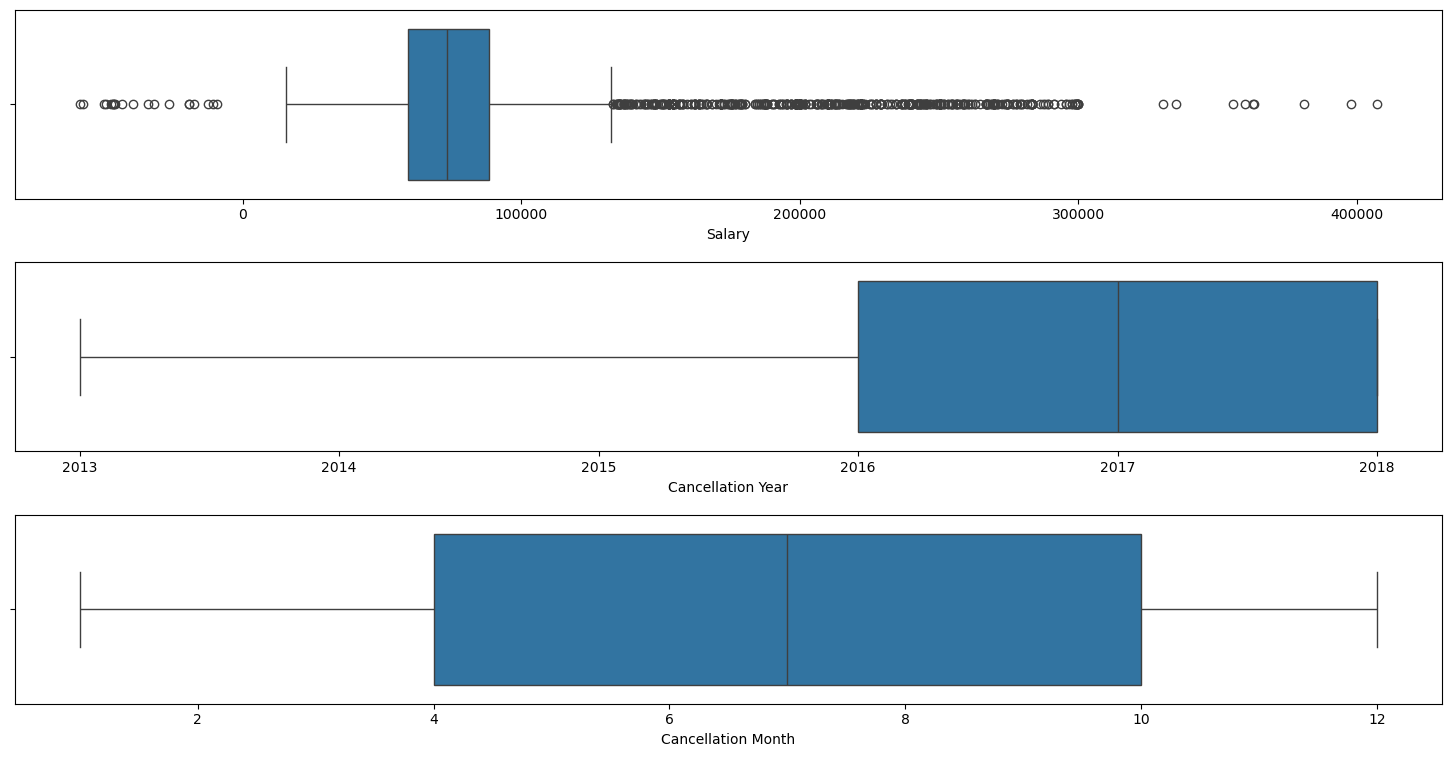

In [324]:
# 1. # Quiero conocer si hay valores atípicos. Para ello uso el gráfico de boxplot y para ver las tres columnas, el método plt.sublots

fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (15,10)) 

axes = axes.flat # . flat Facilita la iteración entre gráficos.

for indice, col in enumerate(nulos_fidelidad_marca):
    sns.boxplot(x = col, data = df_fidelidad_marca, ax = axes[indice])
    
plt.tight_layout() # Evita que se superpongan los gráficos
fig.delaxes(axes[-1])

--------------------------

Columna 'Salary'
- Hay una gran cantidad de valores atípicos. 
- Hay valores negativos.
- Hay una gran cantidad de valores positivos atípicos. 

Con esta información, pasaré a analizar cómo gestionar la imputación ya que el porcentaje de nulos es alto. Para ello analizaré los valores que hay en la columna. 

Columnas 'Cancellation Year' y 'Cancellation Month' 
- No hay valores atípicos. 
- Por otra parte, el que haya valores nulos sugiere que los clientes siguen de alta en el programa de fidelidad.
- El método de imputación lo analizaré a continuación junto con la columna de Salario, al contener las tres valores nulos. 

--------------------------

### Gestión nulos - negativos de la columna Salary

In [325]:
# Ya había analizado que en la columna 'Salary' hay valores negativos. Por lo que paso a analizar cómo gestionarlos. 
# Para ello empiezo mirando sus estadísticas. 
df_fidelidad_marca['Salary'].describe().T.reset_index().round()

,index,Salary
0,count,12499.0
1,mean,79246.0
2,std,35008.0
3,min,-58486.0
4,25%,59246.0
5,50%,73455.0
6,75%,88518.0
7,max,407228.0


In [326]:
# Para comprender por qué están estos datos negativos, es importante saber qué porcentaje hay. 
# Si es bajo, puede ser un error aislado y/o tipográfico; o si es alto, hay que verificar si hay un problema sistemático en la recopilación de datos.

# Para conocer el porcentaje, sumo todos los valores negativos y los divido por el total de registros de la columna.  
print(f'El porcentaje de resultados negativos es: {(df_fidelidad_marca['Salary'] < 0).sum()*100 / df_fidelidad_marca.shape[0]}%')

El porcentaje de resultados negativos es: 0.11949572802772301%


In [327]:
# El porcentaje es bajo por lo que es muy posible que de trate de un error tipográfico.

# Teniendo en cuenta que es un valor importante dentro del análisis, decido cambiar estos valores a positivos como valores absolutos. 

In [328]:
# Convertir valores negativos a positivos
df_fidelidad_marca['Salary'] = df_fidelidad_marca['Salary'].abs()

In [329]:
# Estadísticas descriptivas
df_fidelidad_marca['Salary'].describe().T.head().round()


count    12499.0
mean     79359.0
std      34750.0
min       9081.0
25%      59246.0
Name: Salary, dtype: float64

In [330]:
# Compruebo el porcentaje de valores negativos
print(f'El porcentaje de resultados negativos es: {(df_fidelidad_marca['Salary'] < 0).sum()*100 / df_fidelidad_marca.shape[0]}%')

El porcentaje de resultados negativos es: 0.0%


In [331]:
# A continuación pasamos a gestionar los nulos que hay que la columna 'Salary'

df_fidelidad_marca.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [333]:
# Intento saber si hay mucha diferencia entre aplicar la media o la mediana para decidir qué tipo de imputación hacer. 
# Aunque sé que hay valores atípicos, quiero estar segura de usar la técnica que menos cambios haga en la estadística.
df_fidelidad_marca['Salary'].describe()[["mean", "50%"]].round()

mean    79359.0
50%     73455.0
Name: Salary, dtype: float64

La media de la edad de los clientes es: 79359.34
La mediana de la edad de los clientes es: 73455.0


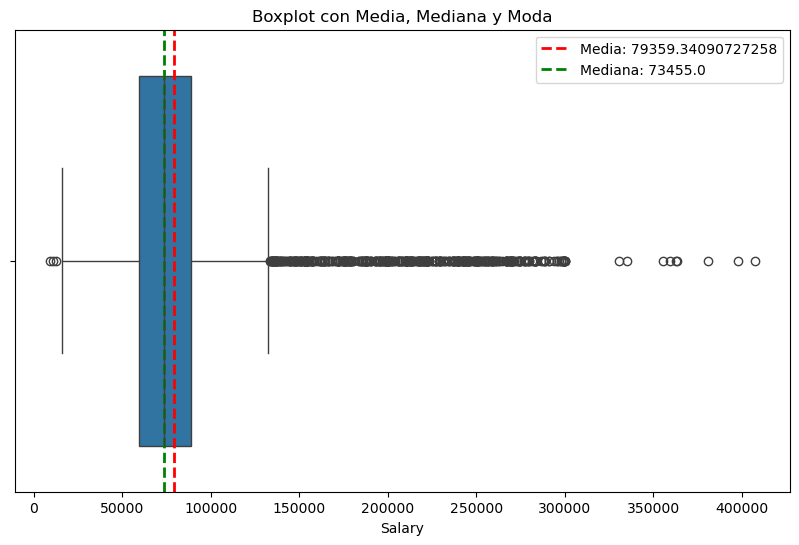

In [334]:
# Visualizo a través de gráfica el resultado

media_salario = df_fidelidad_marca['Salary'].mean()
print(f"La media de la edad de los clientes es: {np.round(media_salario, 2)}")

mediana_salario = df_fidelidad_marca['Salary'].median()
print(f"La mediana de la edad de los clientes es: {np.round(mediana_salario, 2)}")


plt.figure(figsize=(10, 6))
sns.boxplot(x=df_fidelidad_marca['Salary'])

# Dibujar líneas para la media, mediana y moda
plt.axvline(media_salario, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_salario}')
plt.axvline(mediana_salario, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana_salario}')

# Añadir leyenda y título
plt.legend()
plt.title('Boxplot con Media, Mediana y Moda')

# Mostrar el gráfico
plt.show()

### Conclusiones tras ver la gráfica

1. **Valores Atípicos**: La gráfica de boxplot muestra que hay valores atípicos en la columna 'Salary'. Estos valores atípicos pueden influir en la media y la mediana de los datos.

2. **Valores Negativos**: Inicialmente, había valores negativos en la columna 'Salary', pero estos se han convertido a valores absolutos, eliminando así los valores negativos.

3. **Media vs Mediana**: La media y la mediana de los salarios son bastante similares. Esto señala que la distribución de los salarios es relativamente simétrica, a pesar de la presencia de valores atípicos. Ya con estos datos podría usar SimpleImputer usando la mediana. Pero en este caso voy a probar con una técnica más precisa para gestionar los nulos.

4. **Imputación de Nulos**: Quiero hacer una prueba con la técnica Imputer Interative porque me puede dar una solución más precisa y robusta pero antes, voy a analizar la relación entre las columnas de nulos.


#### Pruebas de técnicas avanzadas para elegir la más precisa a la hora de gestionar los nulos.

In [338]:
# Saber si hay una relación significativa entre las variables con valores nulos, me ayudará a decidir si aplicar o no otras técnicas avanzadas.
# Para ello creo una tabla de correlación.

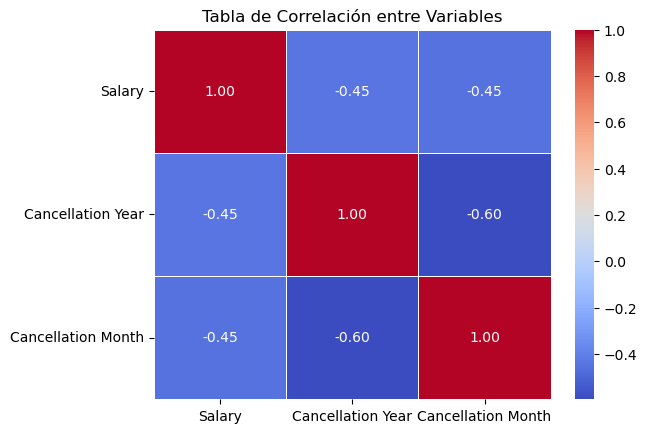

,Salary,Cancellation Year,Cancellation Month
Salary,1.000000,-0.445502,-0.454016
Cancellation Year,-0.445502,1.000000,-0.595424
Cancellation Month,-0.454016,-0.595424,1.000000


In [339]:
# a) Selecciono las columnas que considero relevantes para el análisis. 
# b) Creo un nuevo DataFrame con las columnas o campos que me interesan.
df_columnas_relevantes = df_fidelidad_marca[['Salary', 'Cancellation Year', 'Cancellation Month']].corr()

# b) Creo la tabla de correlación
matrix_de_correlacion = df_columnas_relevantes.corr()

# c) Elegimos el método para visualizar la tabla de correlación como un heatmap
sns.heatmap(matrix_de_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Tabla de Correlación entre Variables')
plt.show()

# Mostrar la tabla de correlación para interpretación
matrix_de_correlacion

- Conclusión:
    - Existe una correlación débil entre las variables, por lo que decido no aplicar otras técnicas de gestión de nulos, ya que la imputación podría no ser efectiva y alterar los resultados del resto de análisis.

    - Aplico técnica de imputación SimpleImputer

**Simple Imputer**

In [340]:
# creo el objeto de la clase del SimpleImputer, usando la mediana directamente debido a los valores atípicos o extremos
imputer_salario = SimpleImputer(strategy = 'median')

# ajustamos y transformamos los datos. 📌 Fijaos como hemos puesto dos corchetes en el nombre de la columna
salario_imputado = imputer_salario.fit_transform(df_fidelidad_marca[['Salary']])

# comprobamos que es lo que nos devuelve este método. Nos devuelve un array. 
salario_imputado

array([[83236.],
       [73455.],
       [73455.],
       ...,
       [73455.],
       [57297.],
       [75049.]])

In [342]:
# Lo siguiente que hago es introducir este array en el DataFrame. 
df_fidelidad_marca['Salary'] = salario_imputado

# Por último compruebo si hay nulos. 
print(f'Después del "SimpleImputer" tenemos {df_fidelidad_marca['Salary'].isnull().sum()} nulos')

Después del "SimpleImputer" tenemos 0 nulos


In [343]:
df_fidelidad_marca.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                    0
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

### Gestión nulos - columna 'Cancellation Year' y 'Cancellation Month'

- El método de imputación finalmente lo haré con un fullna(), reemplazando los valores nulos por 0, ya que indican que aún no hay fecha de cancelación.

In [351]:
# Relleno los valores nulos de las columnas 'Cancellation Year' y 'Cancellation Month' con 0
print('Relleno los valores nulos de las columnas "Cancellation Year" y "Cancellation Month" con 0') 
df_fidelidad_marca['Cancellation Year'] = df_fidelidad_marca['Cancellation Year'].fillna(0) 
df_fidelidad_marca['Cancellation Month'] = df_fidelidad_marca['Cancellation Month'].fillna(0)

df_fidelidad_marca.isnull().sum()

Relleno los valores nulos de las columnas "Cancellation Year" y "Cancellation Month" con 0


Loyalty Number        0
Country               0
Province              0
City                  0
Postal Code           0
Gender                0
Education             0
Salary                0
Marital Status        0
Loyalty Card          0
CLV                   0
Enrollment Type       0
Enrollment Year       0
Enrollment Month      0
Cancellation Year     0
Cancellation Month    0
dtype: int64

----------------

¡¡¡Después me he dado cuenta que podría haber usado la matriz de correlación con otras variables similares a Salary, y saber si 
podría imputar con otras técnicas!!!

-----------------

### Gestión de Duplicados

In [366]:
# Recuerdo los duplicados en df_vuelos
df_vuelos.duplicated().sum()


1864

In [367]:
# Identifico filas duplicadas considerando todas las columnas
duplicados_vuelos = df_vuelos[df_vuelos.duplicated(keep=False)]

# Mostrar un resumen de los duplicados encontrados
num_duplicados = duplicados_vuelos.shape[0]
duplicados_totales = duplicados_vuelos.head()

num_duplicados, duplicados_totales

(3712,
      Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
 41           101902  2017      1               0                        0   
 42           101902  2017      1               0                        0   
 226          112142  2017      1               0                        0   
 227          112142  2017      1               0                        0   
 477          126100  2017      1               0                        0   
 
      Total Flights  Distance  Points Accumulated  Points Redeemed  \
 41               0         0                 0.0                0   
 42               0         0                 0.0                0   
 226              0         0                 0.0                0   
 227              0         0                 0.0                0   
 477              0         0                 0.0                0   
 
      Dollar Cost Points Redeemed  
 41                             0  
 42                          

In [368]:
# Se han identificado 3712 filas duplicadas en el conjunto de datos. 
# Se eliminan duplicados manteniendo solo la primera ocurrencia
df_vuelos_sin_duplicados = df_vuelos.drop_duplicates(keep='first')

# Confirmo el tamaño del DataFrame después de eliminar duplicados
df_vuelos_sin_duplicados.shape

(403760, 10)

In [370]:
# Verifico después de eliminar los duplicados

print('Número de filas originales:', len(df_vuelos))
print('Número de filas después de eliminar duplicados:', len(df_vuelos_sin_duplicados))

Número de filas originales: 405624
Número de filas después de eliminar duplicados: 403760


In [376]:
# Compruebo duplicados de primera ocurrencia en df_vuelos, a través de la columna 'Loyalty Number'.

df_vuelos[df_vuelos.duplicated(keep=False)].sort_values('Loyalty Number').head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0


- Vemos que se mantienen los duplicados de primera ocurrencia, los demás se han eliminado correctamente

---------------

### Antes de hacer la unión verifico los valores únicos en ambos dataframes

In [383]:
# Cuento los valores únicos de la columna 'Loyalty Number' en cada DataFrame
unicos_vuelos = len(df_vuelos['Loyalty Number'].unique())
unicos_fidelidad_marca = len(df_fidelidad_marca['Loyalty Number'].unique())

# Resultados
print(f'Valores únicos en df_flight_data: {unicos_vuelos}')
print(f'Valores únicos en df_loyalty_history: {unicos_vuelos}')

Valores únicos en df_flight_data: 16737
Valores únicos en df_loyalty_history: 16737


#### Transformación de datos 

In [381]:
# Convierto las columnas Cancellation Year y Cancellation Month de float a int
df_fidelidad_marca['Cancellation Year'] = df_fidelidad_marca['Cancellation Year'].astype('int64')
df_fidelidad_marca['Cancellation Month'] = df_fidelidad_marca['Cancellation Month'].astype('int64')

In [382]:
# Compruebo el cambio

df_fidelidad_marca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              16737 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   16737 non-null  int64  
 15  Cancellation Month  16737 non-null  int64  
dtypes: f

## Unión de dataframes

In [384]:
## Unimos todos los datos en un único df para trabajar con el a partir de ahora, elijo hacer merge porque tienen columna en común: "loyalty_number" por lo que tiene sentido agrupar los datos usando esa referencia

df_merge = df_vuelos_sin_duplicados.merge(df_fidelidad_marca, left_on = 'Loyalty Number', right_on = 'Loyalty Number')
df_merge.head(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,73455.0,Single,Nova,2887.74,Standard,2013,3,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,73455.0,Divorced,Nova,2838.07,Standard,2016,7,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,0,0


In [385]:
# Compruebo los duplicados tras hacer la unión

print( f' El total de duplicados es: {df_merge.duplicated().sum()}')

 El total de duplicados es: 0


In [386]:
df_merge.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
dtype: int64

In [143]:
# Guardamos el CSV con los cambios aplicados

df_merge.to_csv('df_merge.csv', index=False)


### Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes
gráficas usando la mejor gráfica que consideres:

In [387]:
# Recordamos las columnas del dataframe

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

In [145]:
palette = 'magma'

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [ ]:
    # Para conocer la distribución de vuelos reservados por mes durante el año necesito los campos Flights Booked y Month. 
    # Las dos son variables numéricas, por lo que uso el método de visualización Barplot.   

In [388]:
 # Agrupo los meses para luego calcular los vuelos reservados, y ver así su distribución a lo largo del año.
 reservas_mes = df_merge.groupby('Month')['Flights Booked'].sum().reset_index()
reservas_mes

,Month,Flights Booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


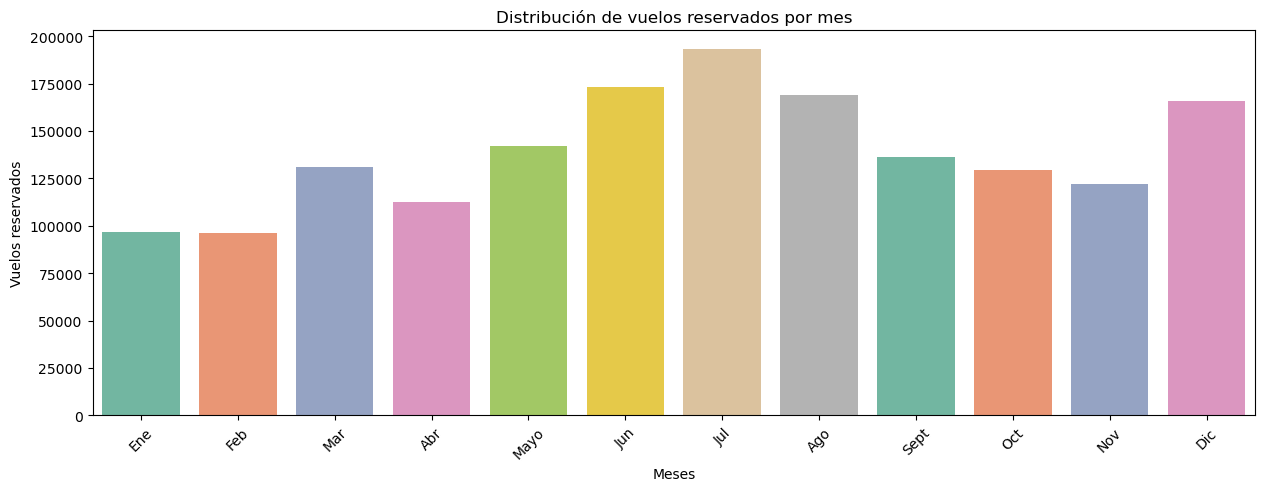

In [389]:
# Gráfico
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,5))

# Gráfico
sns.barplot(x = 'Month',
            y = 'Flights Booked',
            hue = 'Month',
            data = reservas_mes,
            palette= 'Set2',
            legend=False,
            )

plt.title ('Distribución de vuelos reservados por mes')
plt.xlabel ('Meses')
plt.ylabel ('Vuelos reservados')

# Para reemplazar los números de los meses por sus nombres, asigno el rango de número, seguidos de los nombres de los meses, en la función xticks. 
plt.xticks(range(0,12), ['Ene', 'Feb', 'Mar', 'Abr', 'Mayo', 'Jun', 'Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dic'])
plt.xticks(rotation=45);

# Mostrar gráfico
plt.show()

----------

Conclusiones:
- Este gráfico me ayuda a identificar tendencias en la reserva de vuelos a lo largo del año, donde Enero y Febrero son los que menos tienen reservas y Julio el que más. 


---------

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

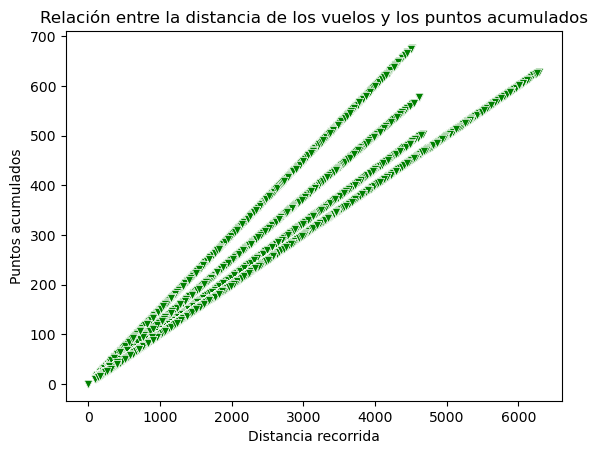

In [390]:
# Para visualizar si hay relación entre estas dos variables numéricas uso el gráfico de dispersión.
sns.scatterplot(x = 'Distance', 
                y = 'Points Accumulated', 
                color = 'green',
                marker= 'v',
                data = df_merge )
plt.title('Relación entre la distancia de los vuelos y los puntos acumulados')
plt.ylabel('Puntos acumulados')
plt.xlabel('Distancia recorrida');

-----------

Conclusión:
- La gráfica de dispersión muestra una relación positiva entre la distancia recorrida en los vuelos y los puntos acumulados por los clientes.
- A medida que la distancia de los vuelos aumenta, también lo hacen los puntos acumulados.
- Esto sugiere que los clientes obtienen más puntos de fidelidad cuando viajan distancias más largas.
- Sin embargo, también se observa una dispersión considerable, lo que indica que otros factores pueden influir en la acumulación de puntos.

----------

**3. ¿Cuál es la distribución de los clientes por provincia o estado?**




In [ ]:
# Uso un gráfico de caja de barras que nos ayuda a visualizar cómo se distribuyen las variables y compararlas, 
# pero antes agrupo la variable sobre la que quiero hacer el cálculo.

In [391]:
# Cuento el número de clientes que hay por Provincia. Para ello hago primero hago una agrupación entre las dos variables y las cuento.

Cliente_provincia = df_merge.groupby('Province')['Loyalty Number'].count().reset_index().round()
Cliente_provincia  # Para ver el dato en la gráfica, como data ponemos esta variable, no el df_merge


,Province,Loyalty Number
0,Alberta,23360
1,British Columbia,106442
2,Manitoba,15900
3,New Brunswick,15352
4,Newfoundland,6244
5,Nova Scotia,12507
6,Ontario,130258
7,Prince Edward Island,1584
8,Quebec,79573
9,Saskatchewan,9861


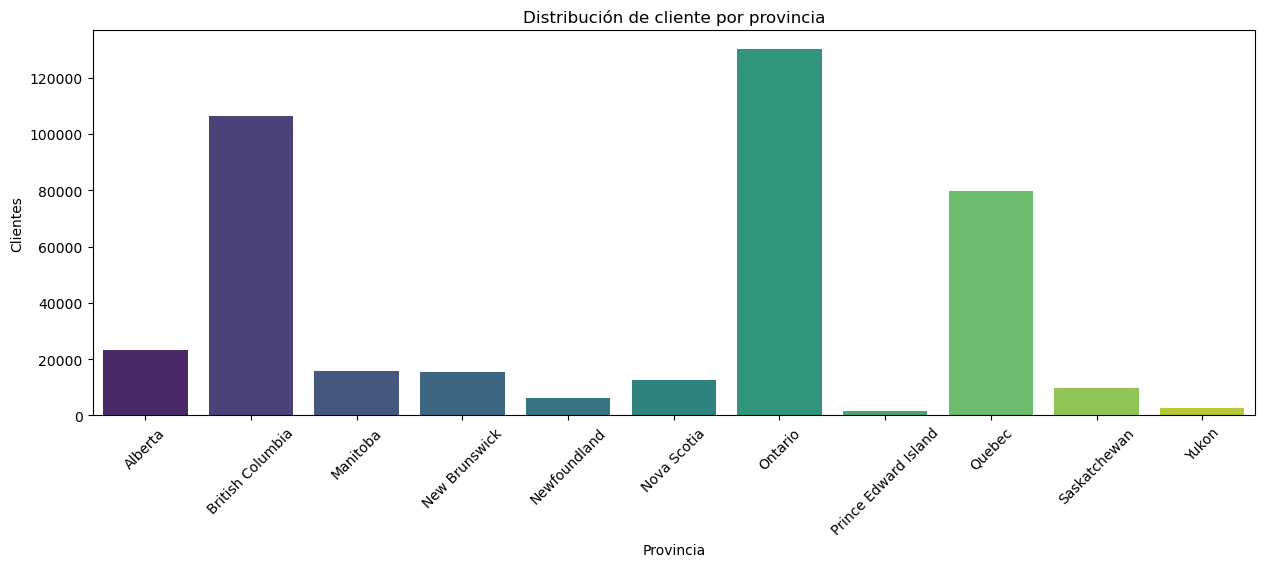

In [392]:
# comenzamos estableciendo nuestra gráfica y indicando el número de filas y columnas que queremos
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15,5))

# Gráfico
sns.barplot(x = 'Province', 
            y = "Loyalty Number", 
            hue = 'Province',
            data = Cliente_provincia,
            palette = "viridis")

plt.title('Distribución de cliente por provincia')
plt.ylabel("Clientes")
plt.xlabel("Provincia")
plt.xticks(rotation=45);

# Mostramos la gráfica
plt.show()
            

----------

Conclusión:
- La provincia con más clientes que están en el programa de lealtad es Ontario, seguido de British Columbia y Quebec. Esto sugiere que son mercados más activos.
- Por otro lado, la distribución de clientes no es uniforme, con una concentración significativa en algunas provincias y una menor participación en otras.

----------

**4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?**

In [393]:
# Al analizar dos variables categóricas y una numérica, uso de nuevo la gráfica Barplot para comparar sus valores. Previamente agruparé.

nivel_educativo = (df_merge.groupby("Education")["Salary"].mean().reset_index()).round()
nivel_educativo

,Education,Salary
0,Bachelor,72599.0
1,College,73455.0
2,Doctor,178404.0
3,High School or Below,61146.0
4,Master,103735.0


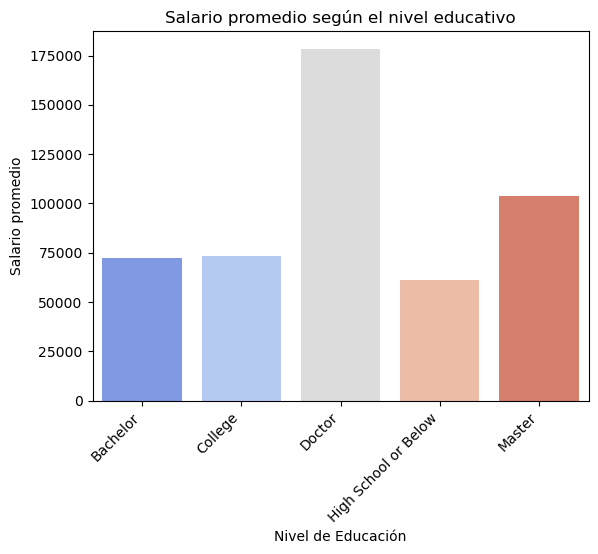

In [394]:
# Gráfico
sns.barplot(x = 'Education',
            y="Salary",
            hue= 'Education', 
            data=nivel_educativo,
            palette='coolwarm')

plt.title('Salario promedio según el nivel educativo')
plt.xlabel("Nivel de Educación")
plt.ylabel("Salario promedio")
plt.xticks(rotation=45, ha='right');  

-------------

Conclusiones:
- De acuerdo a las métricas analizadas, vemos que el salario promedio más alto corresponde a aquellos clientes que tienen un nivel educativo más alto, como 'Doctor'
- Su distribución no es uniforme, viendo así salarios que superan  una media de 175.000 frente a los 60.000 aproximadamente, que son los salarios más bajos.

-----------

**5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?**

In [395]:
# En este caso, para conocer el porcentaje entre una variable categórica y una numérica, decido antes crear una tabla de frecuencia. 
# Posteriorme el resultado del análisis lo muestro en un gráfico tipo barplot. 

# calculo la tabla de frecuencia absoluta
tipo_tarjeta = df_merge['Loyalty Card'].value_counts()

# calculo la tabla de frecuencia relativa incluyendo el parámetro "normalize" para que lo convierta en tanto por 1. 
proporcion_cliente = df_merge['Loyalty Card'].value_counts(normalize=True) * 100

# Creo un DataFrame para mostrar ambas tablas
tabla_frecuencias = pd.DataFrame({
    'Tipo de tarjeta': tipo_tarjeta.index,
    'Proporcion por cliente (%)': proporcion_cliente.values.round()
})
# vemos la tabla de frecuencias
tabla_frecuencias

,Tipo de tarjeta,Proporcion por cliente (%)
0,Star,46.0
1,Nova,34.0
2,Aurora,21.0


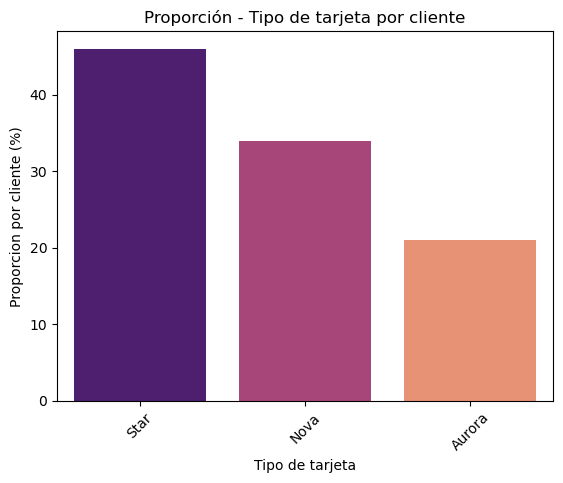

In [396]:
# Gráfico de barras para la frecuencia relativa entre ambas variables
sns.barplot(x='Tipo de tarjeta', y='Proporcion por cliente (%)', hue='Tipo de tarjeta',  data=tabla_frecuencias, palette='magma' )
plt.title('Proporción - Tipo de tarjeta por cliente')
plt.xlabel('Tipo de tarjeta')
plt.ylabel('Proporcion por cliente (%)')
plt.tick_params(axis='x', rotation=45)

----------

Conclusiones:
- En este gráfico se puede observar que la tarjeta 'Star' es la más frecuente entre los clientes del programa de lealtad de la aerolíena.

In [ ]:
# Aquí quería comprobar si al agrupar podía entonces usar el gráfico circular, pero no me ha dado tiempo.

-----------

**6. ¿Cómo se distribuyen los clientes según su estado civil y género?**

In [397]:
# Al tratarse de variables categóricas y numéricas, uso nuevamente un barplot para visualizar los datos. Previamente agrupo. 

genero_estadoc =df_merge.groupby(['Gender','Marital Status'])['Loyalty Number'].count().reset_index()
genero_estadoc

,Gender,Marital Status,Loyalty Number
0,Female,Divorced,30634
1,Female,Married,117363
2,Female,Single,54760
3,Male,Divorced,30128
4,Male,Married,117482
5,Male,Single,53393


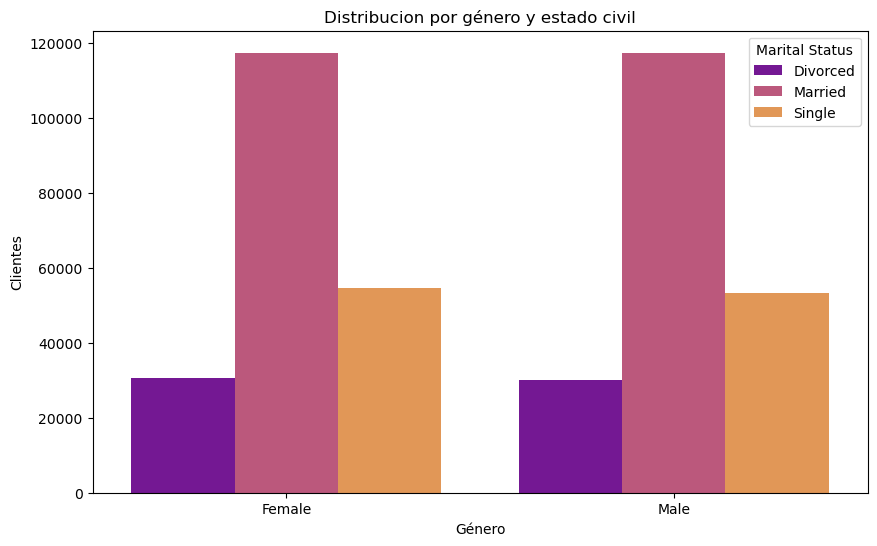

In [234]:
# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', 
            y='Loyalty Number', 
            hue='Marital Status', 
            data=genero_estadoc, 
            palette='plasma')

plt.title('Distribucion por género y estado civil')
plt.xlabel('Género')
plt.ylabel('Clientes')
plt.show()

----------

Conclusiones:
- No se observan diferencias significativas entre hombres y mujeres en relación con su estado civil. Sin embargo, es evidente que la mayoría de la población está casada ("Married"), y en un tercer lugar están las personas divorciadas ("Divorced").

----------

### Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los
pasos que deberas seguir son:
- 1.Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.
- 2.Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada grupo.
- 3.Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia
significativa en el número de vuelos reservados entre los diferentes niveles educativos.